In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading dataset

In [50]:
df = pd.read_csv('Heart Failure prediction.csv')

In [51]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [52]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [55]:
df.shape

(299, 13)

In [56]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [57]:
for col in df.columns:
    print(f'{col}, {len(df[col].unique())}')

age, 47
anaemia, 2
creatinine_phosphokinase, 208
diabetes, 2
ejection_fraction, 17
high_blood_pressure, 2
platelets, 176
serum_creatinine, 40
serum_sodium, 27
sex, 2
smoking, 2
time, 148
DEATH_EVENT, 2


In [58]:
cat_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking','DEATH_EVENT']
con_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

## Summary statistics

In [59]:
df[con_cols].describe().T[['min', '50%','max']].rename(columns={'50%':'avg'})


,min,avg,max
age,40.0,60.0,95.0
creatinine_phosphokinase,23.0,250.0,7861.0
ejection_fraction,14.0,38.0,80.0
platelets,25100.0,262000.0,850000.0
serum_creatinine,0.5,1.1,9.4
serum_sodium,113.0,137.0,148.0
time,4.0,115.0,285.0


## 3) Exploratory Data Analysis¶


### Count plot of categorical features



#### Categorical DATA :

#### anaemia, diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT (YES(1) / NO(0))


#### Numirical DATA :

age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time


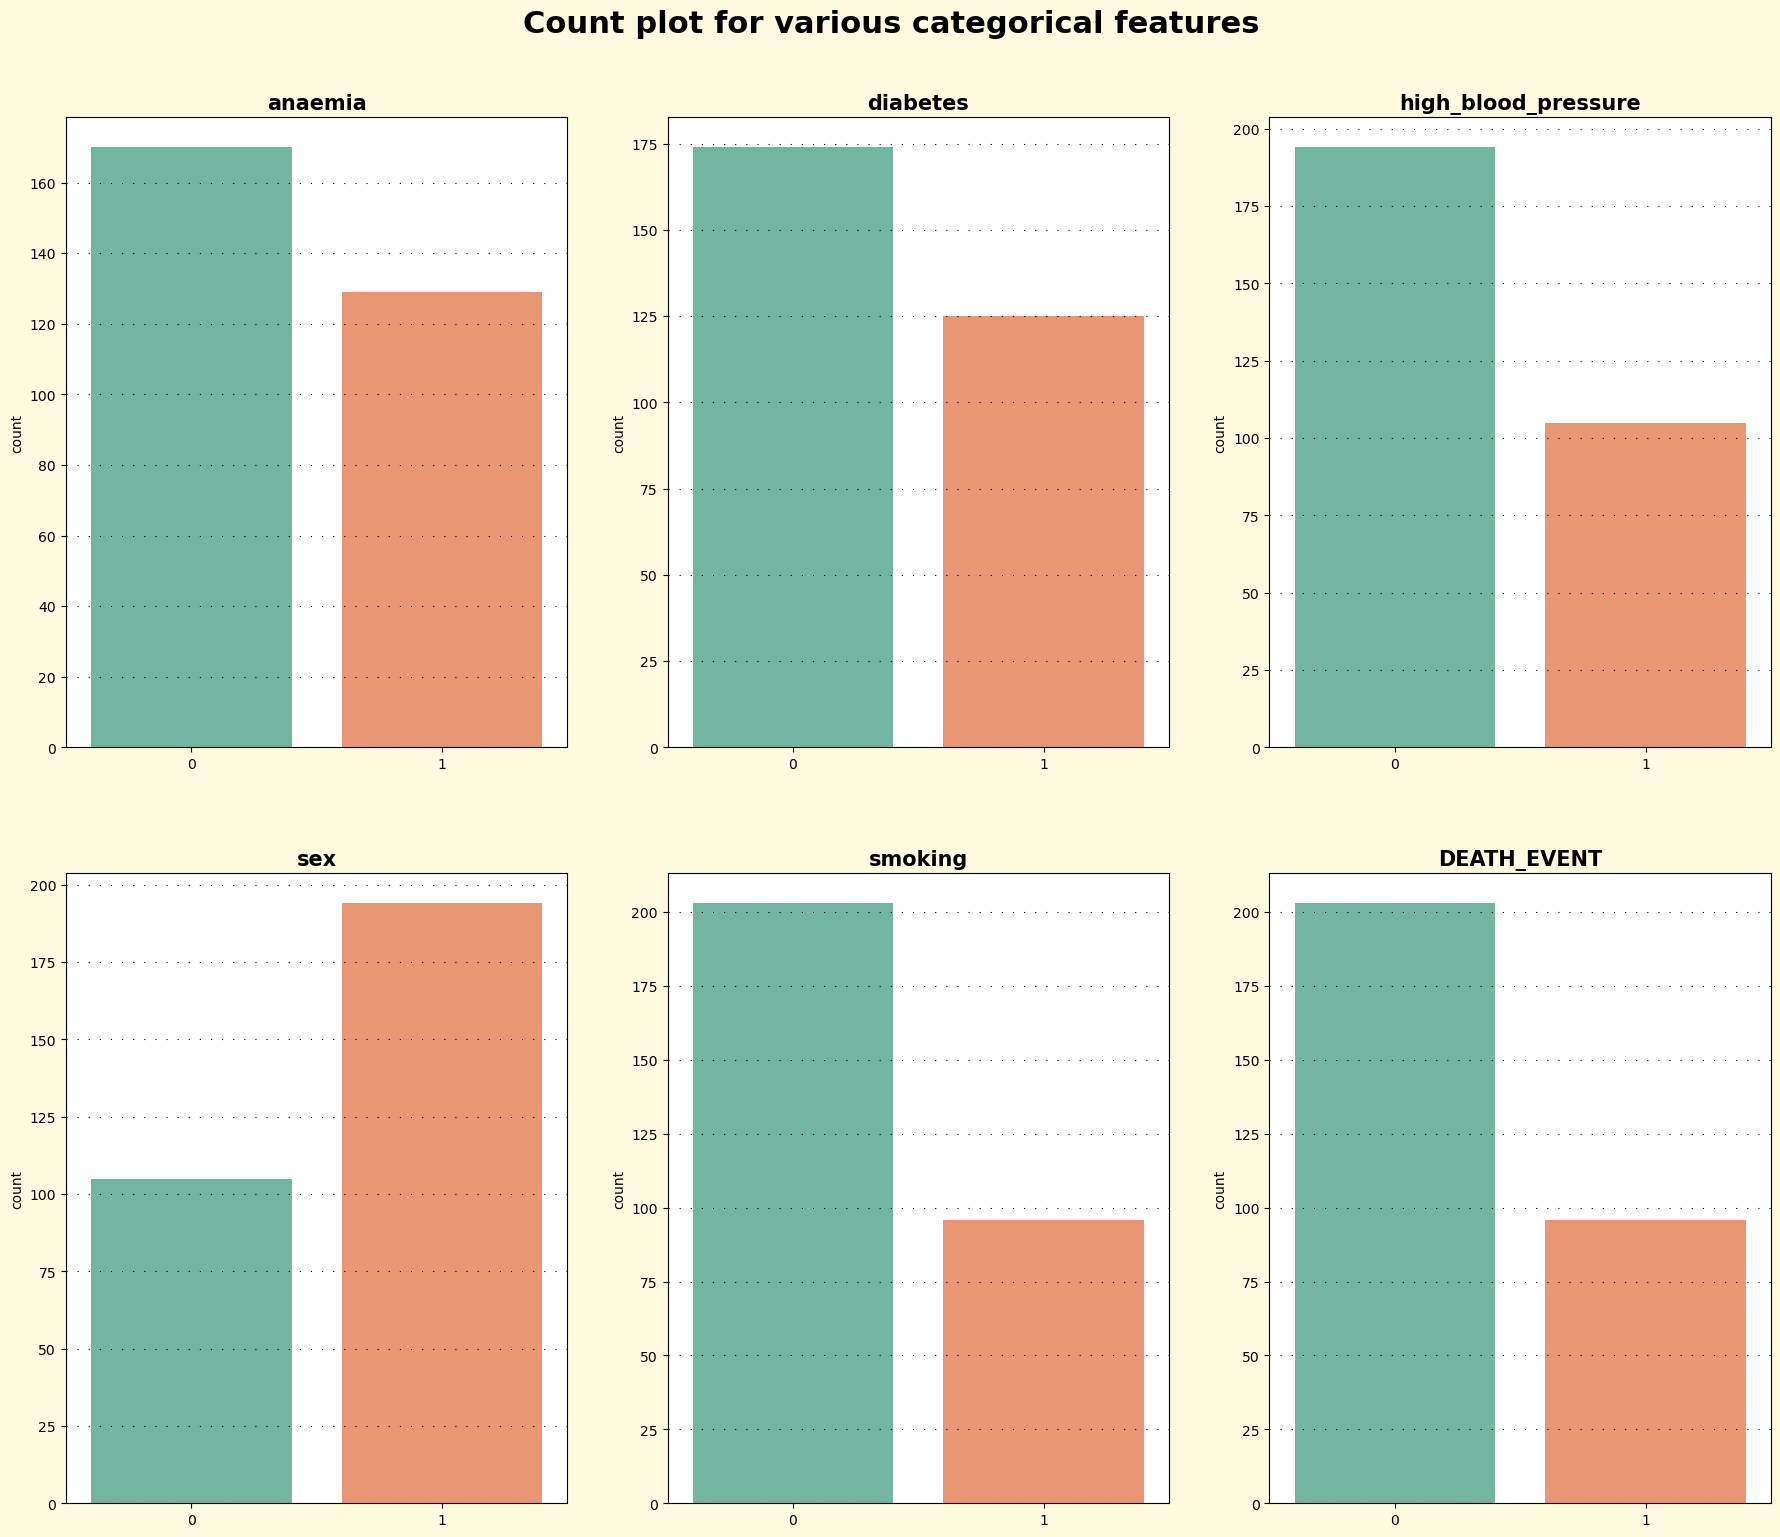

In [60]:
def plot_cate_feat(df, ax, col_name):
    ax.set_title(col_name,fontweight ="bold",fontsize=15)
    ax.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
    sns.countplot(ax=ax,data=df,x=col_name,palette = 'Set2')
    ax.set_xlabel("")

fig = plt.figure(figsize=(22,18))
gs  = fig.add_gridspec(2,3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
axes = [ax1, ax2, ax3, ax4, ax5, ax6]


fig.suptitle(t='Count plot for various categorical features',y=0.94, fontweight ="bold",fontsize=22)
fig.set_facecolor("#fefae0")

for ax,col_name in zip(axes,cat_cols):
    plot_cate_feat(df, ax, col_name)
    
    
    
plt.show()

#### Distribution of continuous features according to target variable



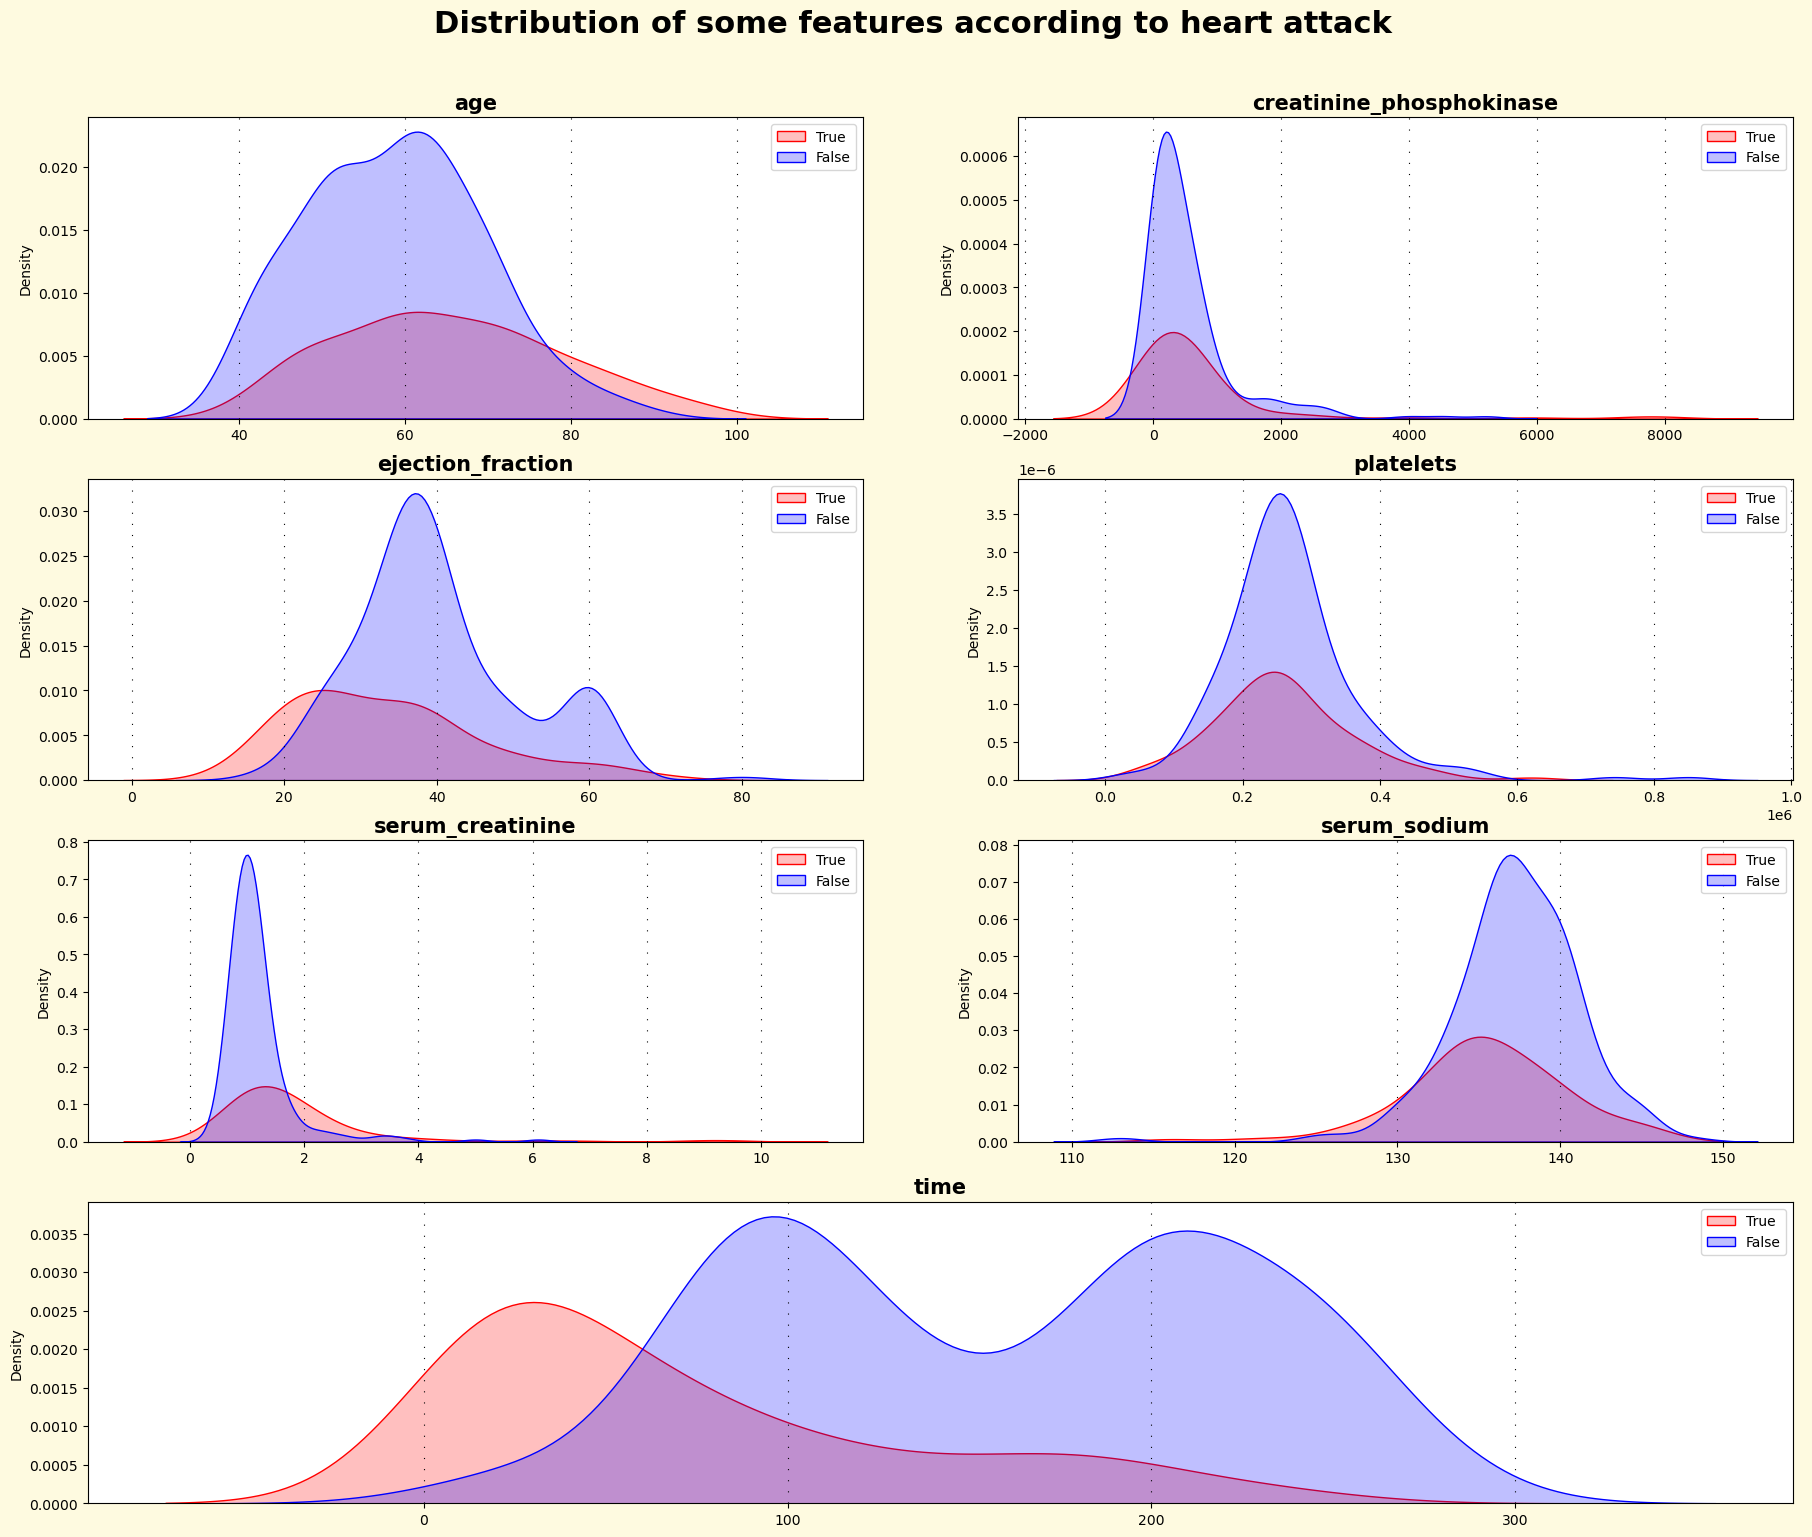

In [61]:

def plot_con_feat(df, ax, col_name, target='DEATH_EVENT'):
    ax.set_title(col_name,fontweight ="bold",fontsize=15)
    ax.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
    sns.kdeplot(ax=ax,data=df,x=col_name, hue=target, fill=True, palette = ['blue','red'])
    ax.legend([True, False])
    ax.set_xlabel("")

fig = plt.figure(figsize=(22,18))
gs  = fig.add_gridspec(4,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])
ax7 = fig.add_subplot(gs[3,:])
axes = [ax1, ax2, ax3, ax4, ax5, ax6,ax7]


fig.suptitle(t='Distribution of some features according to heart attack',y=0.94, fontweight ="bold",fontsize=22)
fig.set_facecolor("#fefae0")

for ax,col_name in zip(axes,con_cols):
    plot_con_feat(df, ax, col_name)

plt.show()

## Correlation between features and 'DEATH_EVENT'



In [62]:
df_corr = df.corr()
df_corr['DEATH_EVENT'].sort_values()

time                       -0.526964
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

<AxesSubplot:>

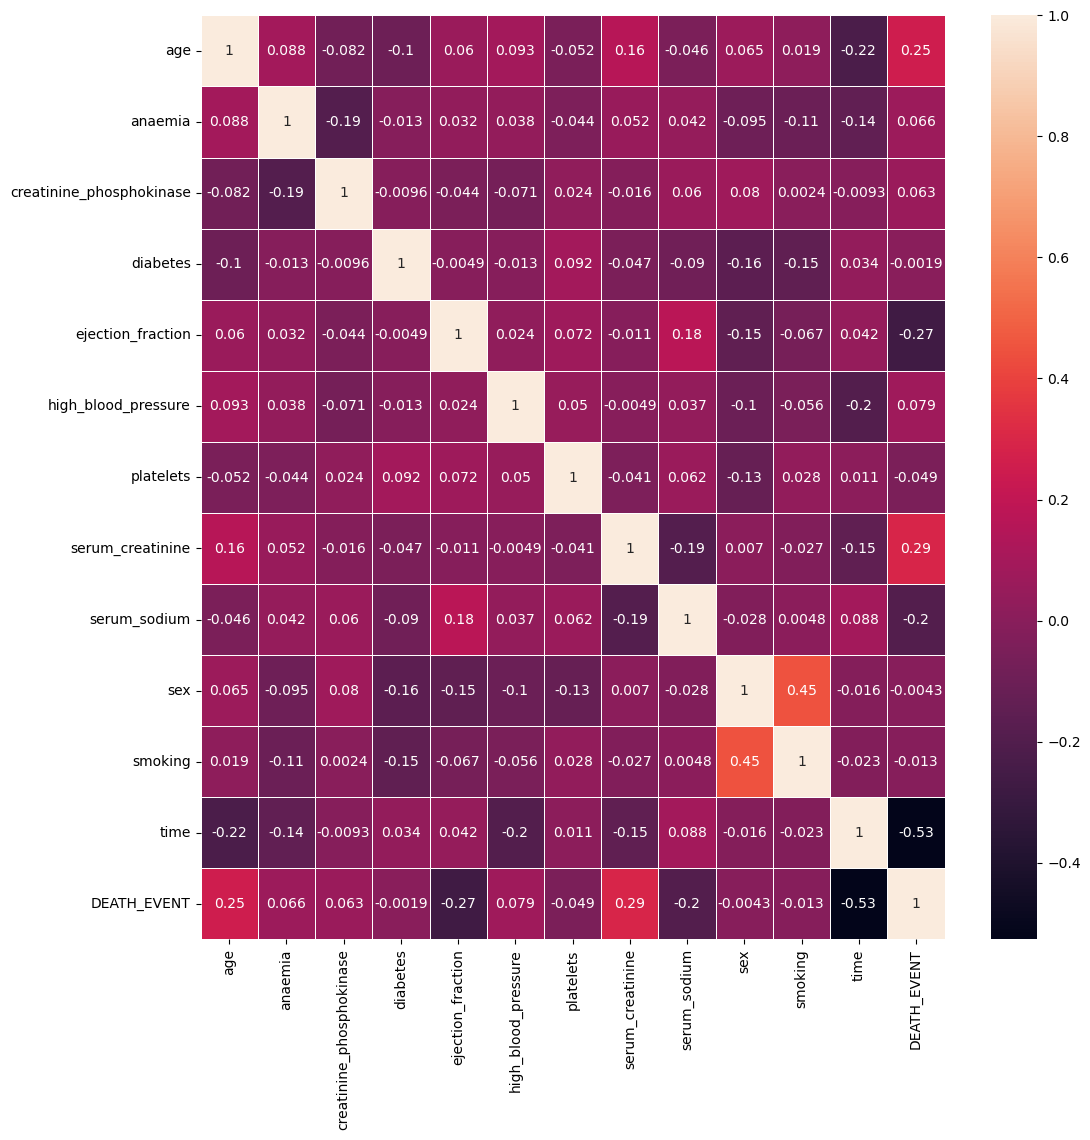

In [63]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=.5) 

## 4) Modeling


#### Importing Packages



In [64]:
#Scaling
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import classification_report, accuracy_score

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import SVC

In [65]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

In [66]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [67]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [68]:
mdl = make_pipeline(StandardScaler(), LogisticRegression())
mdl.fit(x_train,y_train)
y_pred = mdl.predict(x_test)

## 5) Validation


#### get classification report



In [69]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.91      0.91        45\n           1       0.73      0.73      0.73        15\n\n    accuracy                           0.87        60\n   macro avg       0.82      0.82      0.82        60\nweighted avg       0.87      0.87      0.87        60\n'

## Evaluated Score Train DataSet by Model

In [70]:
print('Score TrainDataSet: ',mdl.score(x_train,y_train))

Score TrainDataSet:  0.8493723849372385


## Evaluated Score Test DataSet by Model

In [71]:
print('Score TestDataSet: ',mdl.score(x_test,y_test))

Score TestDataSet:  0.8666666666666667


## Accuracy Score

In [72]:
print(f'Accuracy score of Logistic Regression is {accuracy_score(y_test, y_pred)*100}%')

Accuracy score of Logistic Regression is 86.66666666666667%
